<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Cassificacao_Imagens_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 06/07/2021

In [ ]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd #dataframe
import cv2  #biblioteca que trabalha com imagens
import random #gerar numeros aleatorios
import zipfile  #para trabalhar com arquivos zip
from sklearn.neural_network import MLPClassifier #ANN
from sklearn import preprocessing #Normalização dos dados
from sklearn.model_selection import train_test_split  #Separa os dados como treino e teste
from sklearn.metrics import classification_report #Matriz confusão 

In [ ]:
#clonando o diretório com os arquivos que estão no github
!git clone https://github.com/thessafuzaro/Trabalho_Imagens
%cd Trabalho_Imagens

Cloning into 'Trabalho_Imagens'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 76 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (76/76), done.
/content/Trabalho_Imagens


In [ ]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Daisy.zip','Dandelion.zip','Rose.zip','Not_Flower.zip']  #importando os arquivos
Image_Size=80
Image_Name=[]  #lista em branco
X_Gray=[]  
X_Original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
         # print(name)
          X_Gray.append(cv2.resize(cv2.imread(Name, 0),(Image_Size,Image_Size)))

In [ ]:
X_Gray[0].shape

(80, 80)

In [ ]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)
  #print(Y_Names)

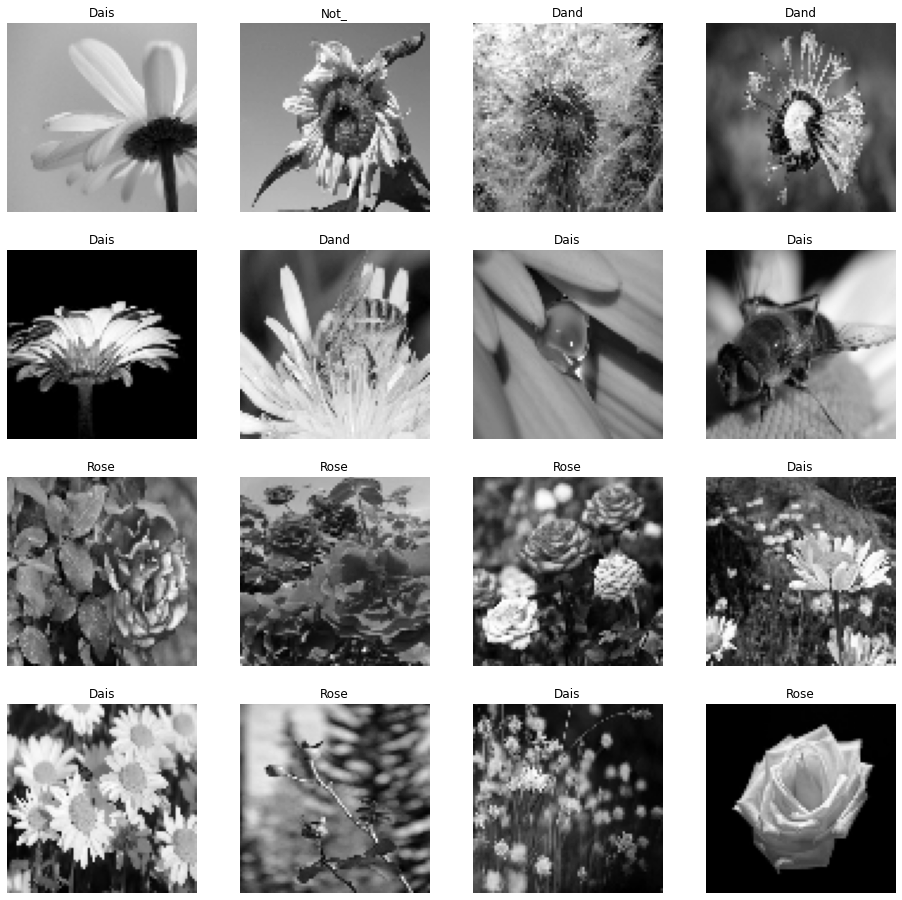

In [ ]:
#Plotando algumas imagens em preto e branco com seus respectivos nomes (4 primeiras letras)
num = len(Y_Names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(X_Gray[kk], cmap='gray')
  plt.title(Y_Names[kk])
  plt.axis("off")

In [ ]:
Unique_List = []      #gera uma lista unica 
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy)

In [ ]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [ ]:
Unique_List #mostrandoa lista unica

['Dais', 'Dand', 'Rose', 'Not_']

In [ ]:
X_Data=[]
for xx in X_Gray:  #lendo  as fotos em preto e branco 
  X_Data.append(xx.ravel())  # cada linha é uma variável dependente 

X = pd.DataFrame(X_Data)

In [ ]:
#Separando os dados em 80% de treino e 20% de teste e misturando os dados
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.40, shuffle=True, random_state=3)

In [ ]:
#Escalonando os dados entre -1 e 1, usando a função preprocessing:
Scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
X_Train = Scaler_X.transform(X_Train)
X_Test = Scaler_X.transform(X_Test)

In [ ]:
#Definindo a rede neural:
model = MLPClassifier(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(20),
                      max_iter=1000,random_state=1)
model.fit(X_Train,Y_Train) #Treinando a rede neural

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Calculando treino e teste por meio da rede neural
Y_Calc_Train=model.predict(X_Train)
Y_Calc_Test=model.predict(X_Test)

In [ ]:
#Fazendo a matriz confusão para treino
df = pd.DataFrame({'True':Y_Train, 'Calc':Y_Calc_Train})
print(pd.crosstab(df['True'],df['Calc']))

Calc    0    1    2   3
True                   
0     269    1    0   0
1       0  259    0   0
2       0    0  313   0
3       0    0    0  82


In [ ]:
#Fazendo a matriz confusão para teste
df = pd.DataFrame({'True':Y_Test, 'Calc':Y_Calc_Test})
print(pd.crosstab(df['True'],df['Calc']))

Calc   0   1   2   3
True                
0     65  55  57  16
1     66  46  55  15
2     48  45  66  31
3      8  14  19  10


In [ ]:
#Chamando a métrica Classification Report
Y_True = Y_Test #Amazenando os dados de teste em Y_True
Y_Pred = Y_Calc_Test #Armazenando os dados calculados para teste em Y_Pred
Title = ['Daisy','Dandelion','Rose','Not_Flower']
print(classification_report(Y_True, Y_Pred,target_names=Title))

              precision    recall  f1-score   support

       Daisy       0.35      0.34      0.34       193
   Dandelion       0.29      0.25      0.27       182
        Rose       0.34      0.35      0.34       190
  Not_Flower       0.14      0.20      0.16        51

    accuracy                           0.30       616
   macro avg       0.28      0.28      0.28       616
weighted avg       0.31      0.30      0.31       616

